In [62]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from datetime import datetime,timedelta

In [63]:
end = (datetime.now() - timedelta(30*8)).strftime("%Y%m%d")
start = (datetime.now() - timedelta(365*3)).strftime("%Y%m%d")
end

'20240729'

In [64]:
parameter = {
    'start' : start,
    'end' : end,
    'latitude' : '-6.9',
    'longitude' : '107.62',
    'community' : 're',
    'parameters' : 'T2M,QV2M,PS,ALLSKY_SFC_SW_DWN',
    'format' : 'json',
    'header' : 'true',
    'time-standard' : 'lst'
}

respond = requests.get('https://power.larc.nasa.gov/api/temporal/hourly/point?',params=parameter)
data = respond.json()
df = pd.DataFrame(data['properties']['parameter'])
df = df.reset_index()
df.tail(24)

,index,T2M,QV2M,PS,ALLSKY_SFC_SW_DWN
20520,2024072900,17.75,13.98,90.92,0.00
20521,2024072901,17.51,13.79,90.87,0.00
20522,2024072902,17.31,13.64,90.83,0.00
20523,2024072903,17.17,13.54,90.82,0.00
20524,2024072904,17.01,13.43,90.84,0.00
20525,2024072905,16.80,13.27,90.88,0.00
20526,2024072906,17.83,13.69,90.94,45.80
20527,2024072907,19.44,14.05,91.00,239.48
20528,2024072908,21.14,14.34,91.04,464.00
20529,2024072909,22.99,14.51,91.03,650.53


In [65]:
df.rename(columns={"index": "time"},inplace=True)


In [66]:
df.describe()

,T2M,QV2M,PS,ALLSKY_SFC_SW_DWN
count,20544.000000,20544.000000,20544.000000,20544.000000
mean,21.854857,15.943896,90.949252,205.748178
std,2.723705,1.329495,0.158541,277.373007
min,13.950000,10.860000,90.410000,-999.000000
25%,19.830000,15.120000,90.840000,0.000000
50%,21.365000,16.060000,90.950000,10.925000
75%,23.980000,16.870000,91.060000,422.057500
max,30.170000,19.570000,91.500000,1024.150000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20544 entries, 0 to 20543
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time               20544 non-null  object 
 1   T2M                20544 non-null  float64
 2   QV2M               20544 non-null  float64
 3   PS                 20544 non-null  float64
 4   ALLSKY_SFC_SW_DWN  20544 non-null  float64
dtypes: float64(4), object(1)
memory usage: 802.6+ KB


In [68]:
df[df.ALLSKY_SFC_SW_DWN == -999]


,time,T2M,QV2M,PS,ALLSKY_SFC_SW_DWN
15840,2024011600,20.72,16.53,90.80,-999.0
15841,2024011601,20.51,16.30,90.74,-999.0
15842,2024011602,20.25,16.03,90.72,-999.0
15843,2024011603,19.96,15.75,90.72,-999.0
15844,2024011604,19.63,15.46,90.75,-999.0
15845,2024011605,19.39,15.24,90.78,-999.0
15846,2024011606,20.48,15.74,90.85,-999.0


In [69]:
df.replace(-999.0 ,0.0 , inplace=True)

In [70]:
df[df.ALLSKY_SFC_SW_DWN == -999]


,time,T2M,QV2M,PS,ALLSKY_SFC_SW_DWN


In [71]:
df['datetime'] = pd.to_datetime(df['time'], format='%Y%m%d%H')
df.head()

,time,T2M,QV2M,PS,ALLSKY_SFC_SW_DWN,datetime
0,2022032700,19.39,15.32,91.01,0.0,2022-03-27 00:00:00
1,2022032701,19.24,15.18,90.96,0.0,2022-03-27 01:00:00
2,2022032702,18.99,14.88,90.93,0.0,2022-03-27 02:00:00
3,2022032703,18.72,14.68,90.92,0.0,2022-03-27 03:00:00
4,2022032704,18.50,14.48,90.95,0.0,2022-03-27 04:00:00


In [72]:
new_df = df[['datetime','ALLSKY_SFC_SW_DWN','PS','QV2M','T2M','time']]
new_df = new_df.set_index('datetime')
new_df.head()

,ALLSKY_SFC_SW_DWN,PS,QV2M,T2M,time
datetime,,,,,
2022-03-27 00:00:00,0.0,91.01,15.32,19.39,2022032700
2022-03-27 01:00:00,0.0,90.96,15.18,19.24,2022032701
2022-03-27 02:00:00,0.0,90.93,14.88,18.99,2022032702
2022-03-27 03:00:00,0.0,90.92,14.68,18.72,2022032703
2022-03-27 04:00:00,0.0,90.95,14.48,18.50,2022032704


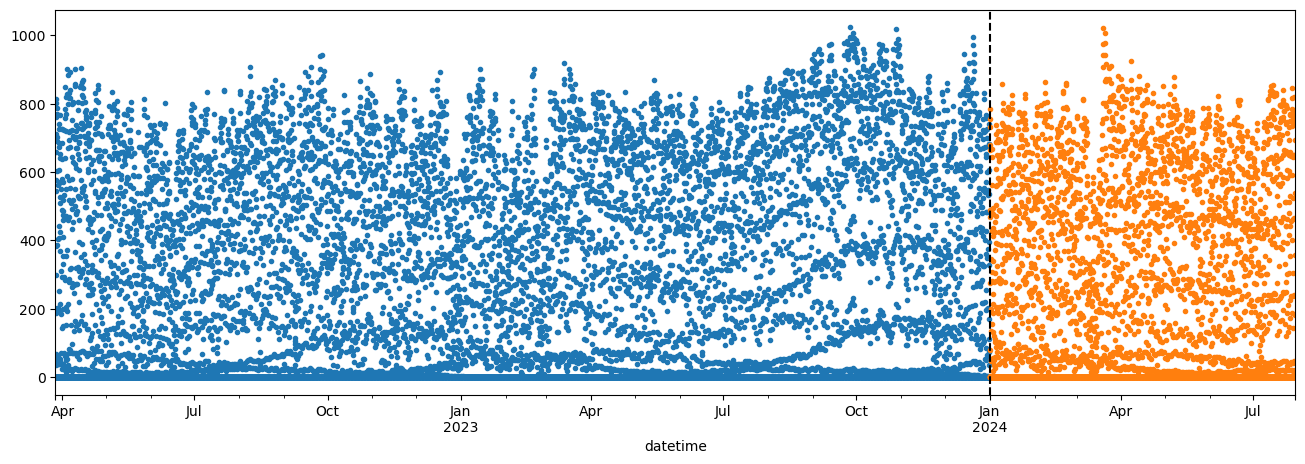

In [73]:
train = new_df.loc[new_df.index < '01-01-2024']
test = new_df.loc[new_df.index >= '01-01-2024']

fig, ax = plt.subplots(figsize=(16,5))
train['ALLSKY_SFC_SW_DWN'].plot(ax=ax , label='train',style='.')
test['ALLSKY_SFC_SW_DWN'].plot(ax=ax, label='test',style='.')
ax.axvline('01-01-2024',color='black',ls='--')
plt.show()

In [74]:
def create_features(df):
  df['hour'] = df.index.hour
  df['dayofweek'] = df.index.dayofweek
  df['quarter'] = df.index.quarter
  df['month'] = df.index.month
  df['year'] = df.index.year
  df['dayofyear'] = df.index.dayofyear
  return df

In [75]:
data_df = create_features(new_df)
data_df.head()

,ALLSKY_SFC_SW_DWN,PS,QV2M,T2M,time,hour,dayofweek,quarter,month,year,dayofyear
datetime,,,,,,,,,,,
2022-03-27 00:00:00,0.0,91.01,15.32,19.39,2022032700,0,6,1,3,2022,86
2022-03-27 01:00:00,0.0,90.96,15.18,19.24,2022032701,1,6,1,3,2022,86
2022-03-27 02:00:00,0.0,90.93,14.88,18.99,2022032702,2,6,1,3,2022,86
2022-03-27 03:00:00,0.0,90.92,14.68,18.72,2022032703,3,6,1,3,2022,86
2022-03-27 04:00:00,0.0,90.95,14.48,18.50,2022032704,4,6,1,3,2022,86


In [76]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20544 entries, 2022-03-27 00:00:00 to 2024-07-29 23:00:00
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ALLSKY_SFC_SW_DWN  20544 non-null  float64
 1   PS                 20544 non-null  float64
 2   QV2M               20544 non-null  float64
 3   T2M                20544 non-null  float64
 4   time               20544 non-null  object 
 5   hour               20544 non-null  int32  
 6   dayofweek          20544 non-null  int32  
 7   quarter            20544 non-null  int32  
 8   month              20544 non-null  int32  
 9   year               20544 non-null  int32  
 10  dayofyear          20544 non-null  int32  
dtypes: float64(4), int32(6), object(1)
memory usage: 1.4+ MB


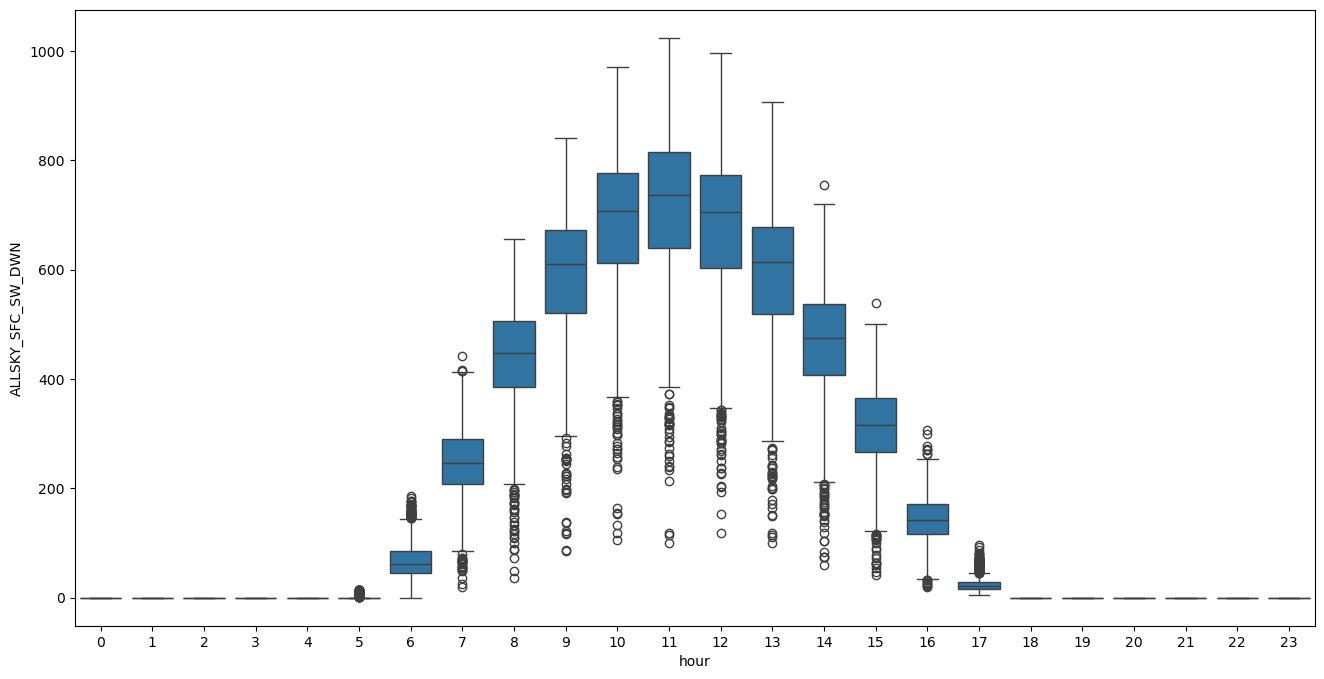

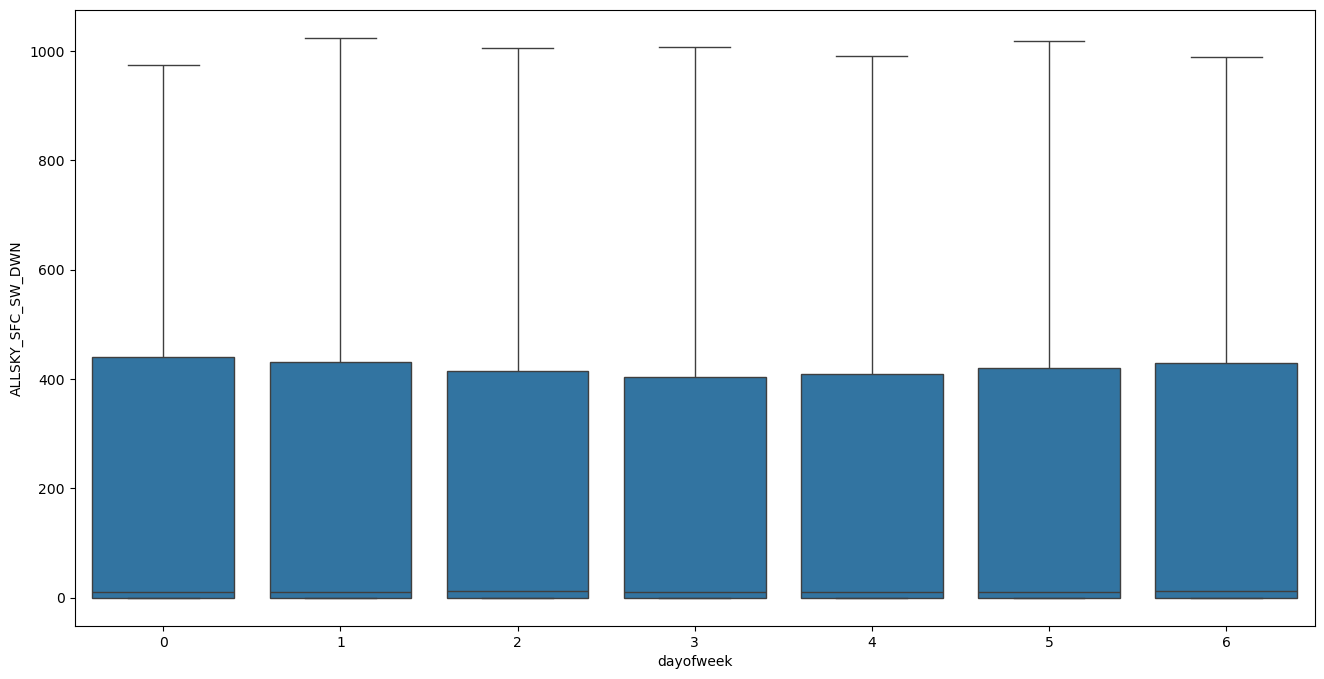

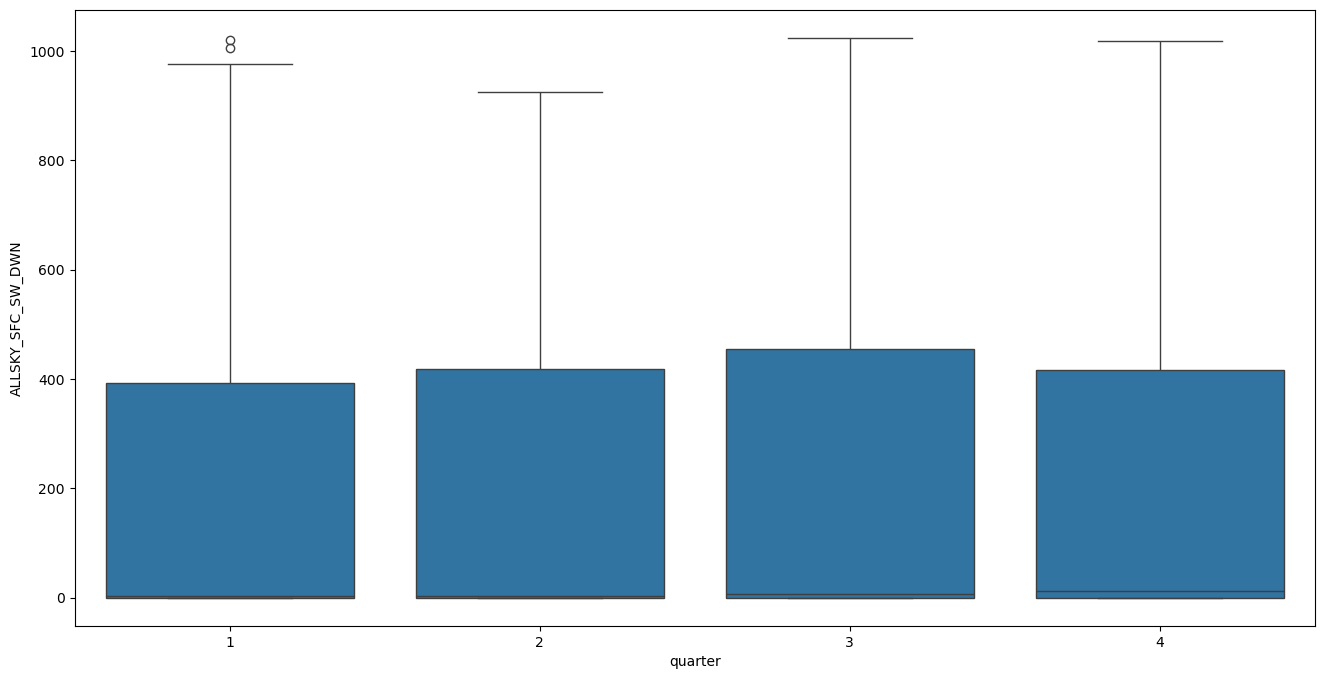

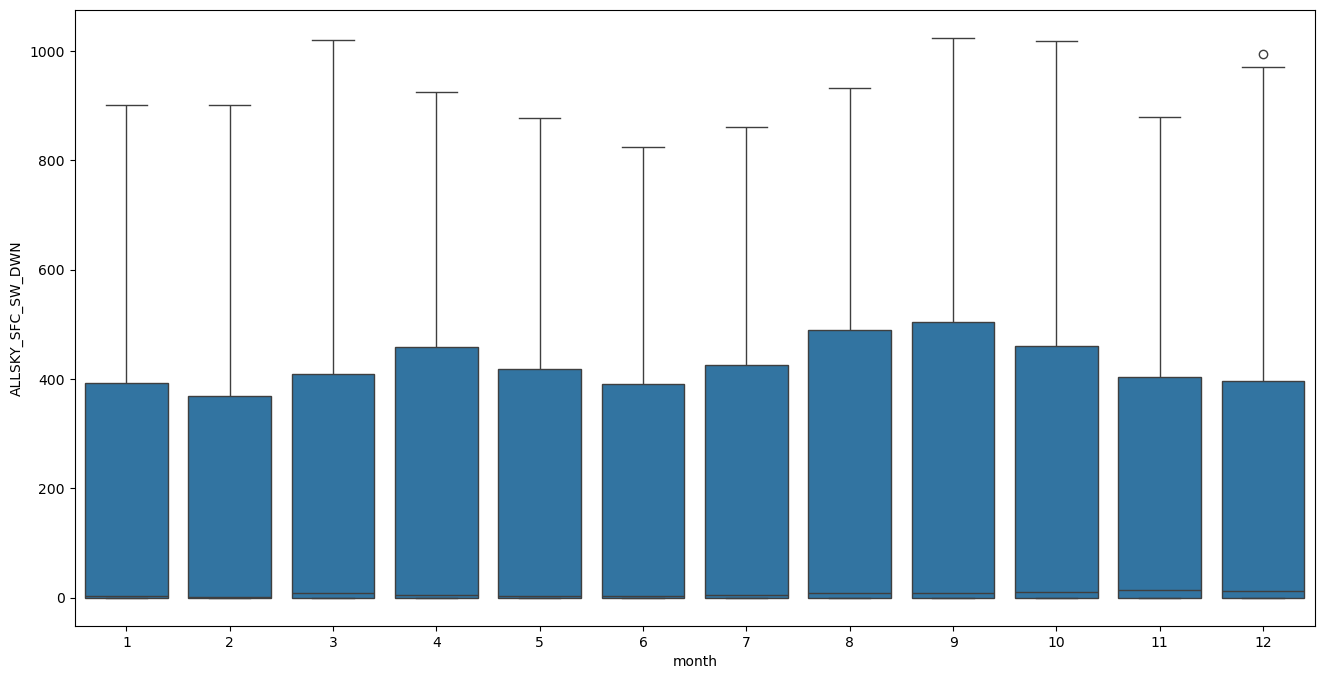

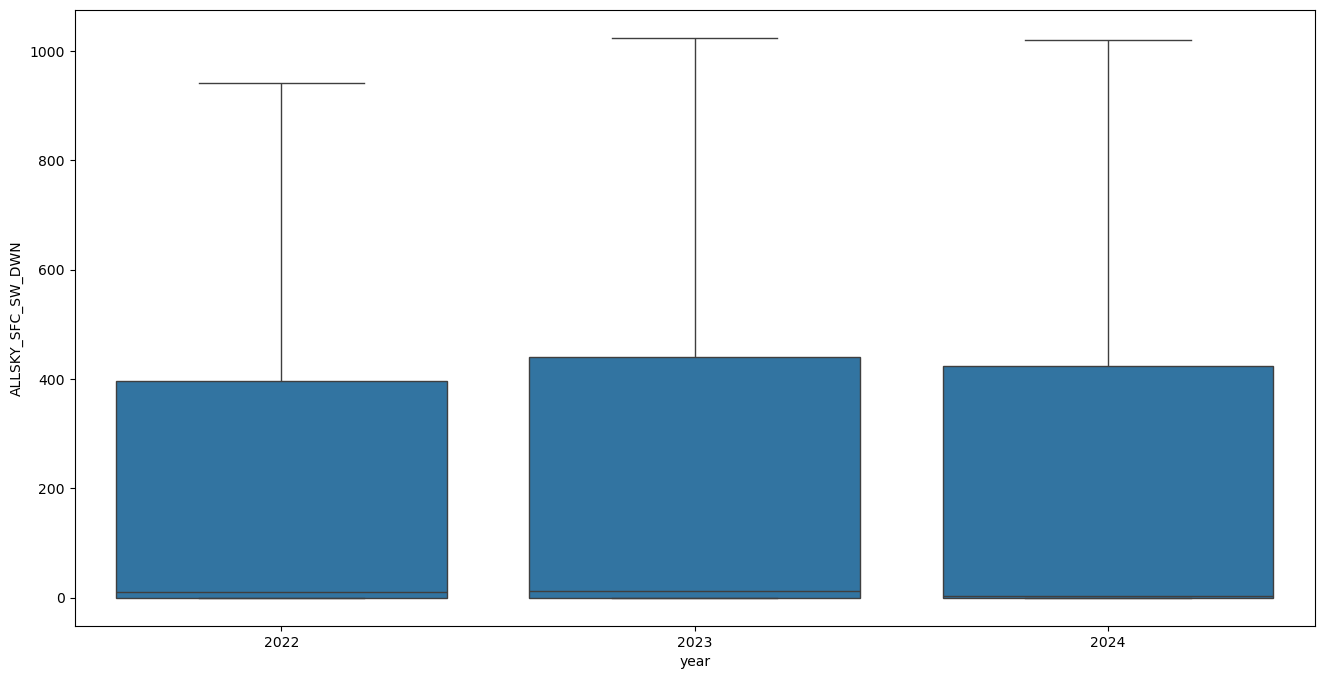

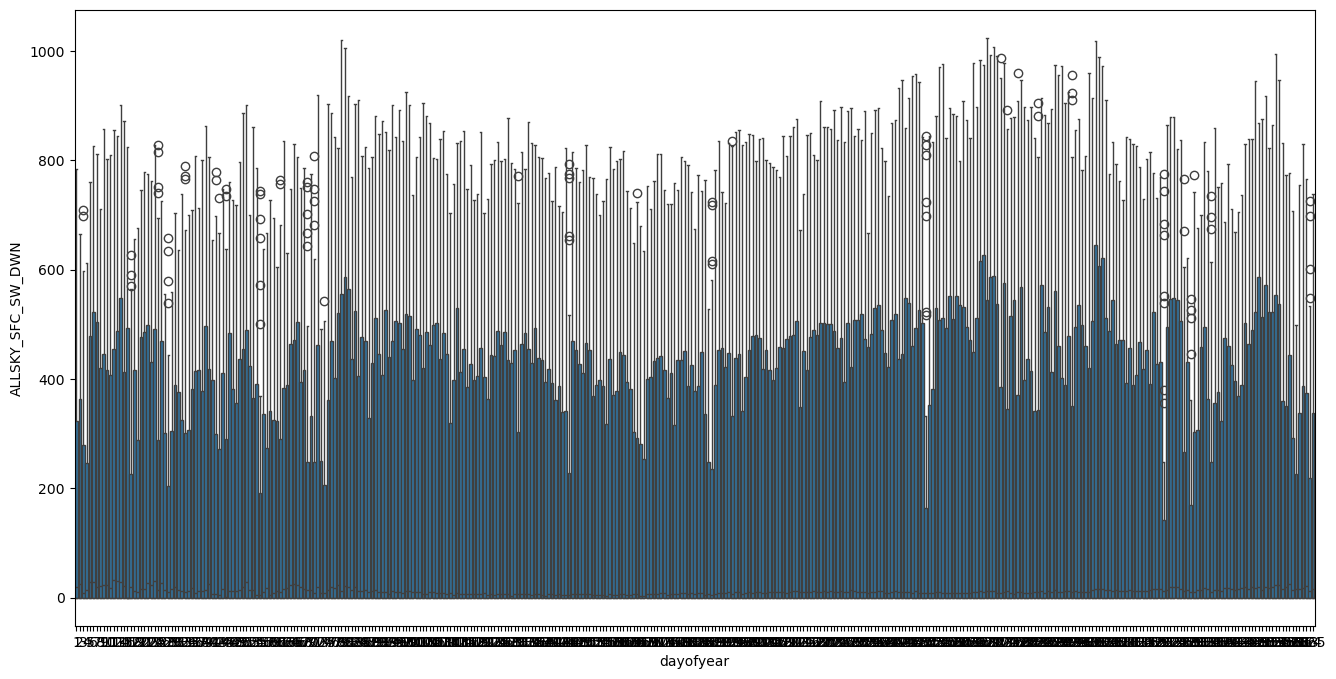

In [77]:
column = ['hour','dayofweek','quarter','month','year','dayofyear']
for i in column:
  fig, ax = plt.subplots(figsize=(16,8))
  sns.boxplot(data=data_df, x =i,y='ALLSKY_SFC_SW_DWN')
  plt.show()

In [78]:
Q1 = data_df['ALLSKY_SFC_SW_DWN'].quantile(0.25)
Q3 = data_df['ALLSKY_SFC_SW_DWN'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [79]:
median = data_df['ALLSKY_SFC_SW_DWN'].median()
data_df['ALLSKY_SFC_SW_DWN'] = np.where((data_df['ALLSKY_SFC_SW_DWN'] < lower_bound) | (data_df['ALLSKY_SFC_SW_DWN'] > upper_bound), median, data_df['ALLSKY_SFC_SW_DWN'])


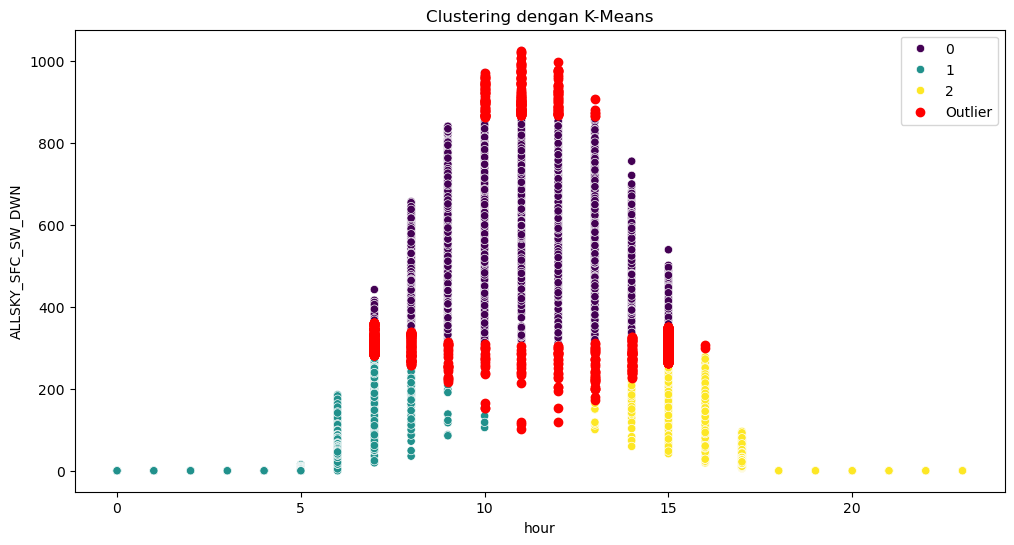

In [80]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalisasi data agar clustering lebih akurat
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_df[['hour', 'ALLSKY_SFC_SW_DWN']])

# Terapkan K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
data_df['cluster'] = kmeans.fit_predict(X_scaled)

# Hitung jarak setiap titik ke centroid terdekat
data_df['distance_to_centroid'] = np.min(kmeans.transform(X_scaled), axis=1)

# Tentukan outlier jika jaraknya jauh dari centroid (misal di atas persentil 95%)
threshold = np.percentile(data_df['distance_to_centroid'], 95)
data_df['is_outlier'] = data_df['distance_to_centroid'] > threshold

# Visualisasi hasil clustering
plt.figure(figsize=(12,6))
sns.scatterplot(data=data_df, x='hour', y='ALLSKY_SFC_SW_DWN', hue='cluster', palette='viridis')
plt.scatter(data_df[data_df['is_outlier']]['hour'], data_df[data_df['is_outlier']]['ALLSKY_SFC_SW_DWN'], color='red', label='Outlier')
plt.title("Clustering dengan K-Means")
plt.legend()
plt.show()


In [81]:
# median_value = df[~df['is_outlier']]['ALLSKY_SFC_SW_DWN'].median()
# df.loc[df['is_outlier'], 'ALLSKY_SFC_SW_DWN'] = median_value

In [82]:
data_df[data_df['is_outlier'] == True].count()

ALLSKY_SFC_SW_DWN       1028
PS                      1028
QV2M                    1028
T2M                     1028
time                    1028
hour                    1028
dayofweek               1028
quarter                 1028
month                   1028
year                    1028
dayofyear               1028
cluster                 1028
distance_to_centroid    1028
is_outlier              1028
dtype: int64

In [83]:
data_df['cluster'].value_counts()

cluster
2    7336
1    6859
0    6349
Name: count, dtype: int64

In [84]:
clean_df = data_df.drop(data_df[data_df['is_outlier'] == True].index)
clean_df.head()

,ALLSKY_SFC_SW_DWN,PS,QV2M,T2M,time,hour,dayofweek,quarter,month,year,dayofyear,cluster,distance_to_centroid,is_outlier
datetime,,,,,,,,,,,,,,
2022-03-27 00:00:00,0.0,91.01,15.32,19.39,2022032700,0,6,1,3,2022,86,1,0.528091,False
2022-03-27 01:00:00,0.0,90.96,15.18,19.24,2022032701,1,6,1,3,2022,86,1,0.390174,False
2022-03-27 02:00:00,0.0,90.93,14.88,18.99,2022032702,2,6,1,3,2022,86,1,0.259482,False
2022-03-27 03:00:00,0.0,90.92,14.68,18.72,2022032703,3,6,1,3,2022,86,1,0.155451,False
2022-03-27 04:00:00,0.0,90.95,14.48,18.50,2022032704,4,6,1,3,2022,86,1,0.150793,False


In [85]:
clean_df['is_outlier'].value_counts()

is_outlier
False    19516
Name: count, dtype: int64

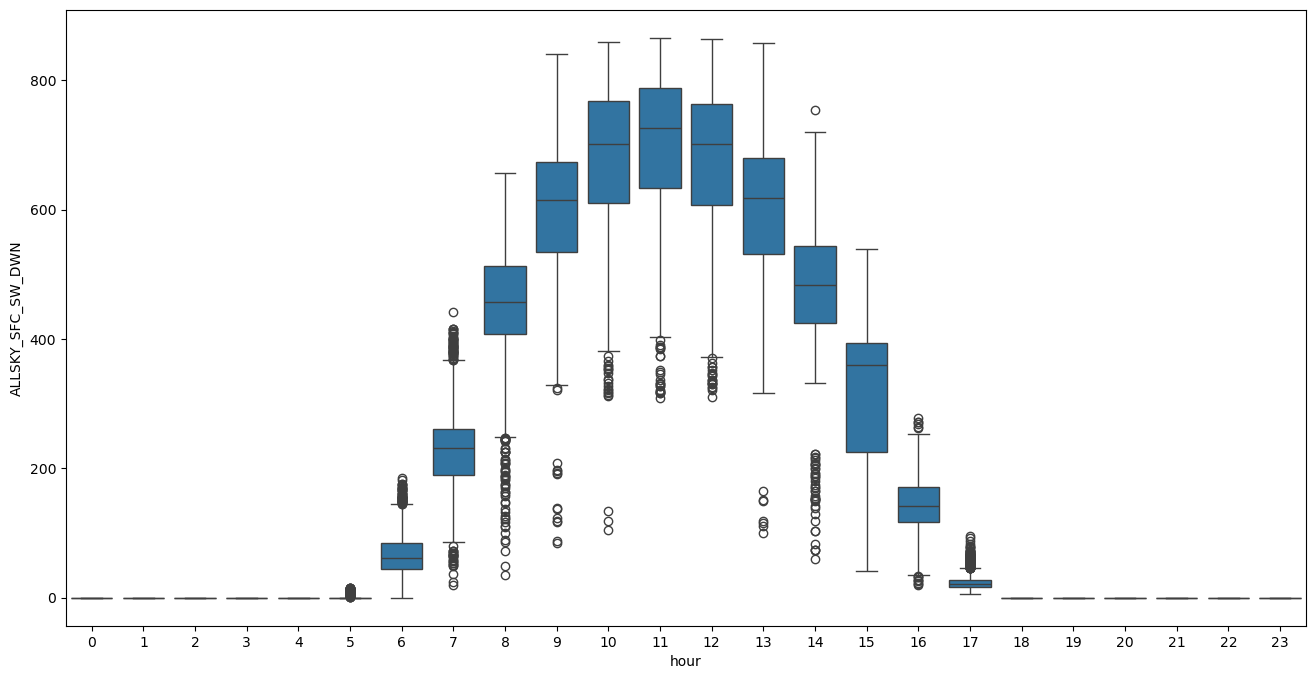

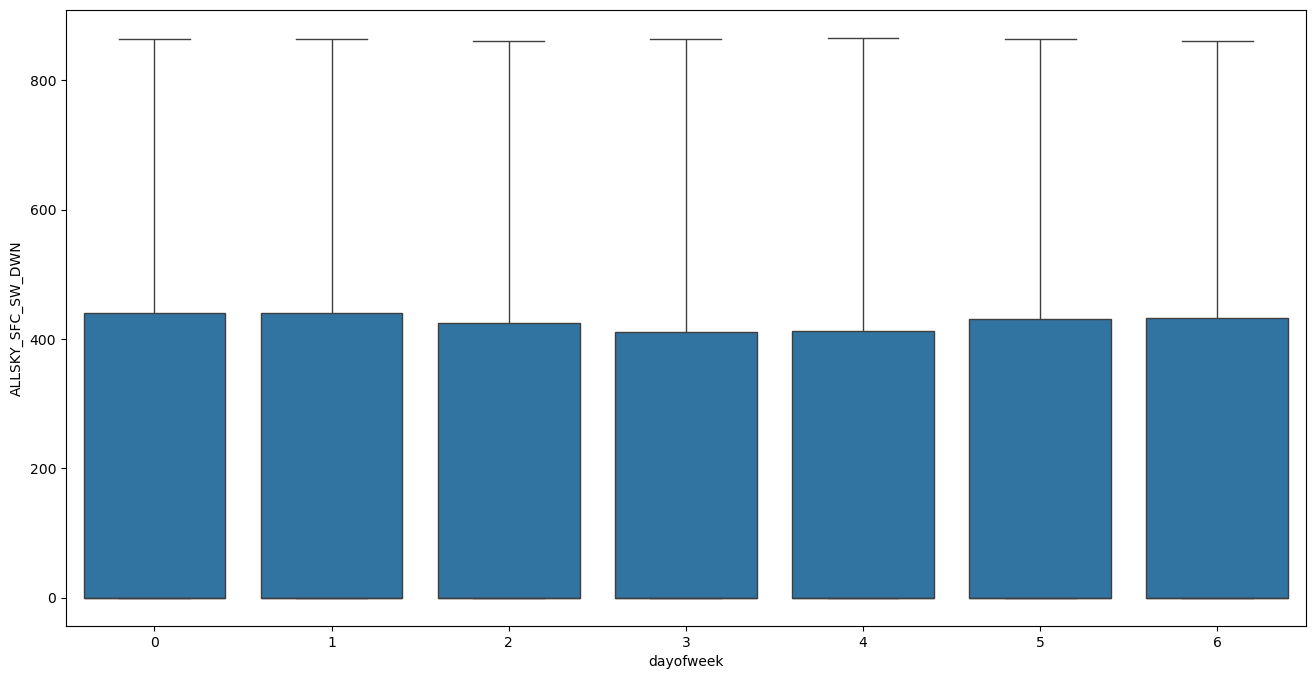

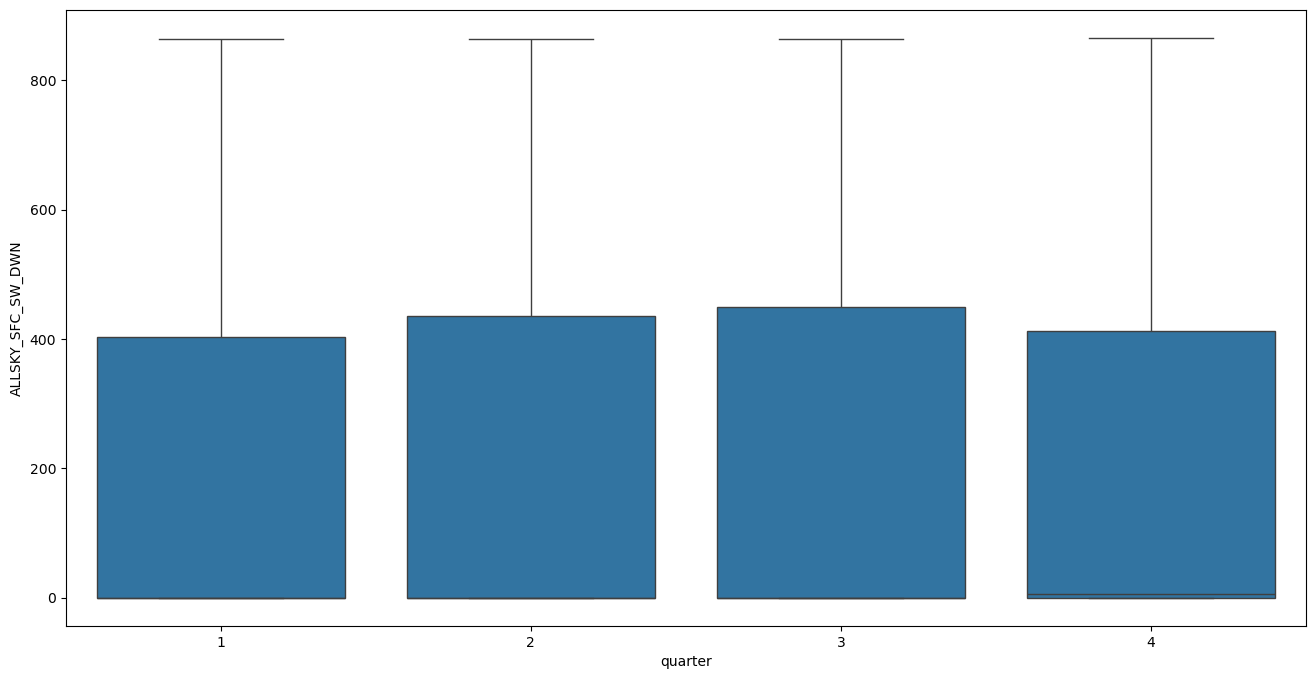

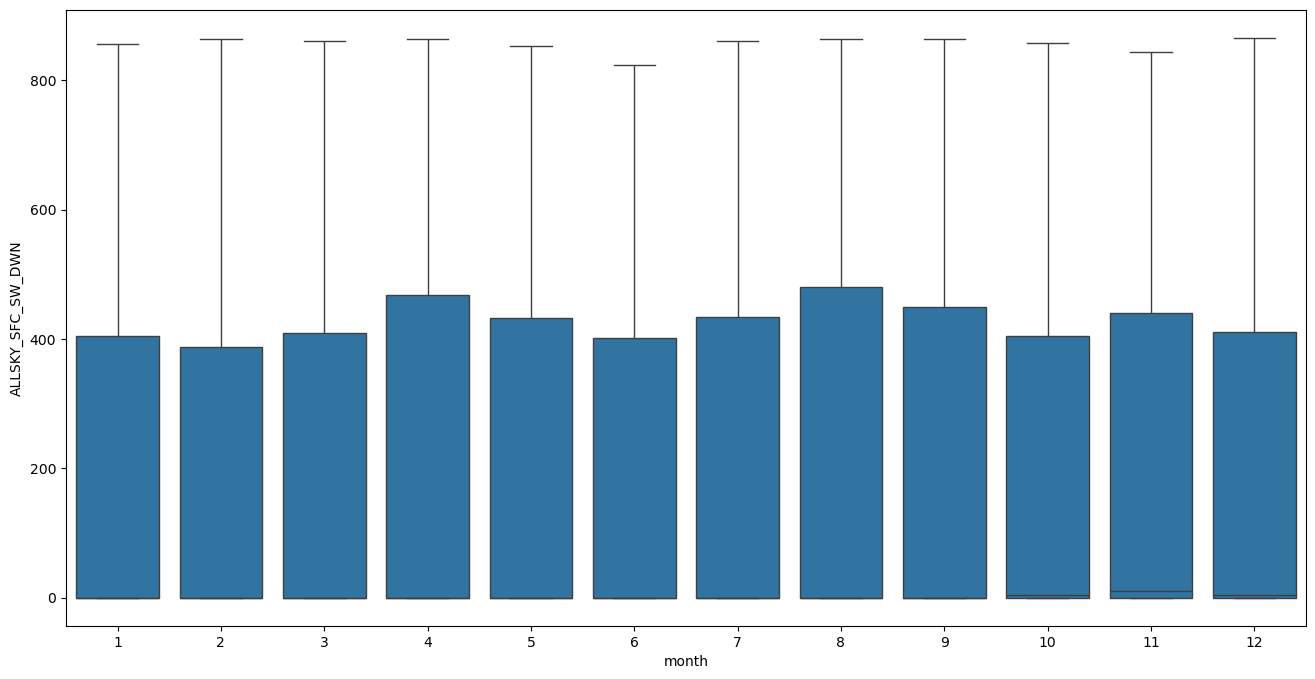

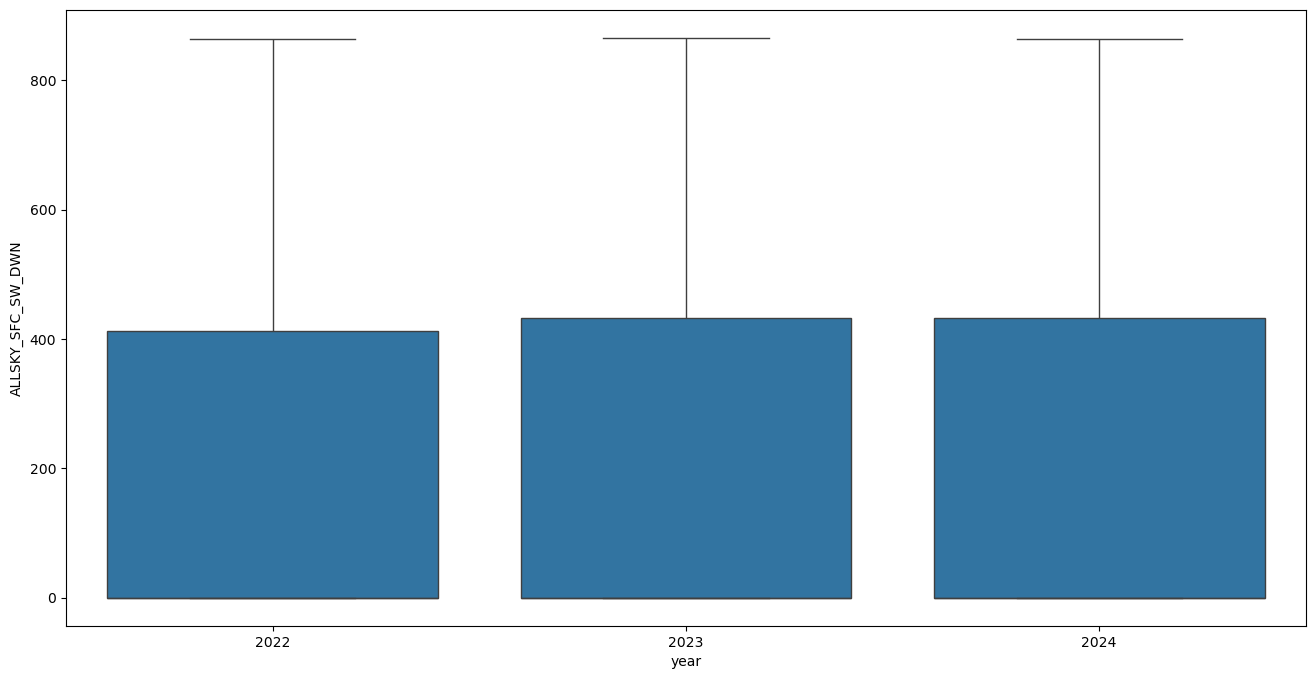

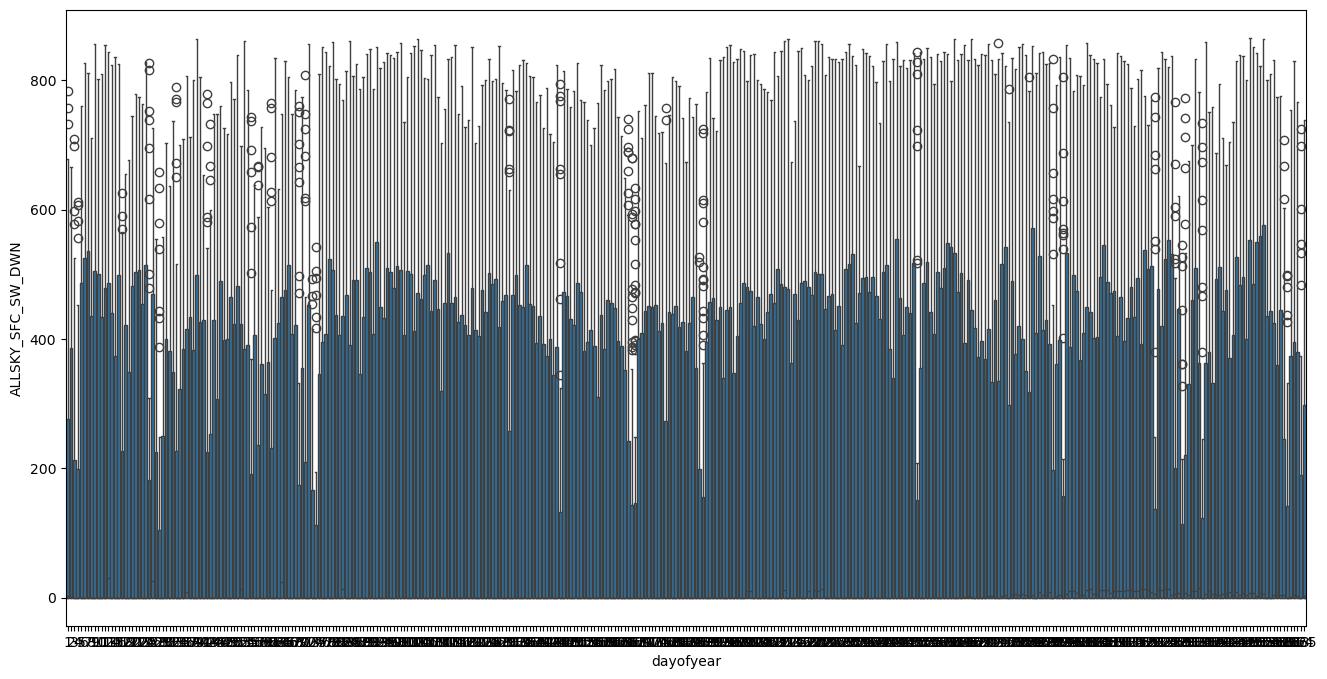

In [86]:
column = ['hour','dayofweek','quarter','month','year','dayofyear']
for i in column:
  fig, ax = plt.subplots(figsize=(16,8))
  sns.boxplot(data=clean_df, x =i,y='ALLSKY_SFC_SW_DWN')
  plt.show()

In [87]:
from scipy.stats.mstats import winsorize

data_df['ALLSKY_SFC_SW_DWN'] = data_df.groupby('hour')['ALLSKY_SFC_SW_DWN'].transform(
    lambda x: winsorize(x, limits=[0.05, 0.05]))  # Membatasi 5% nilai ekstrim

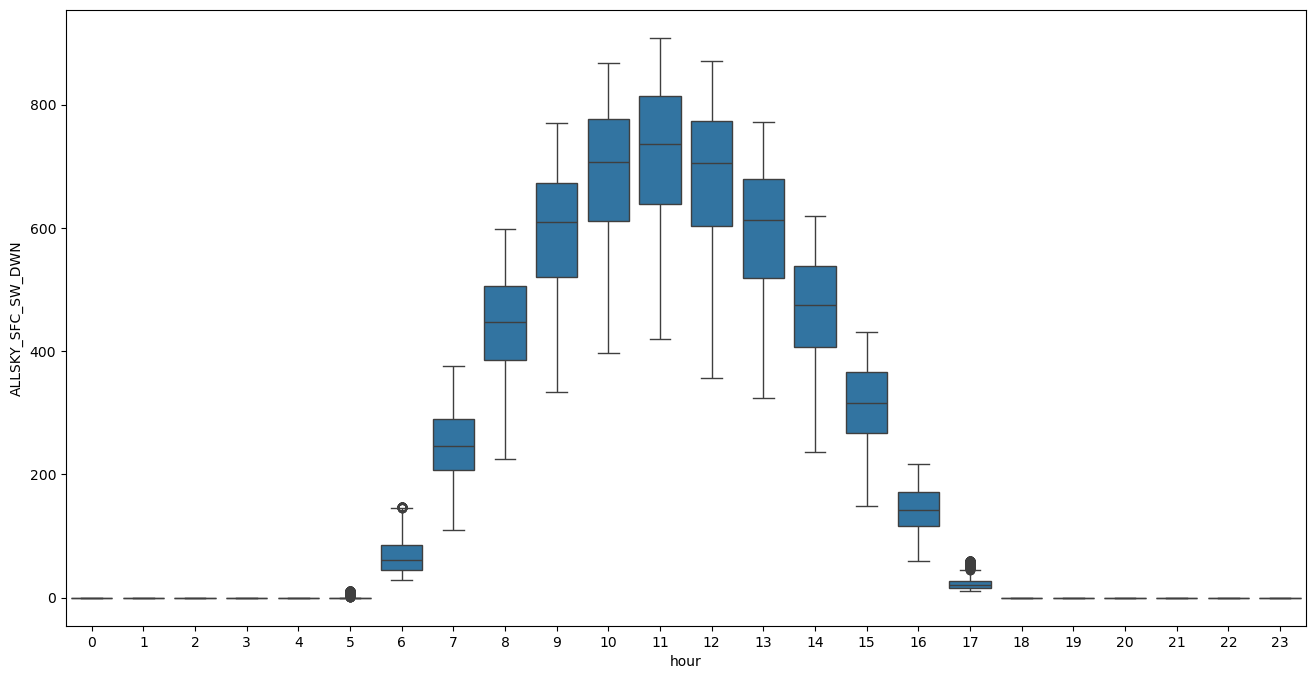

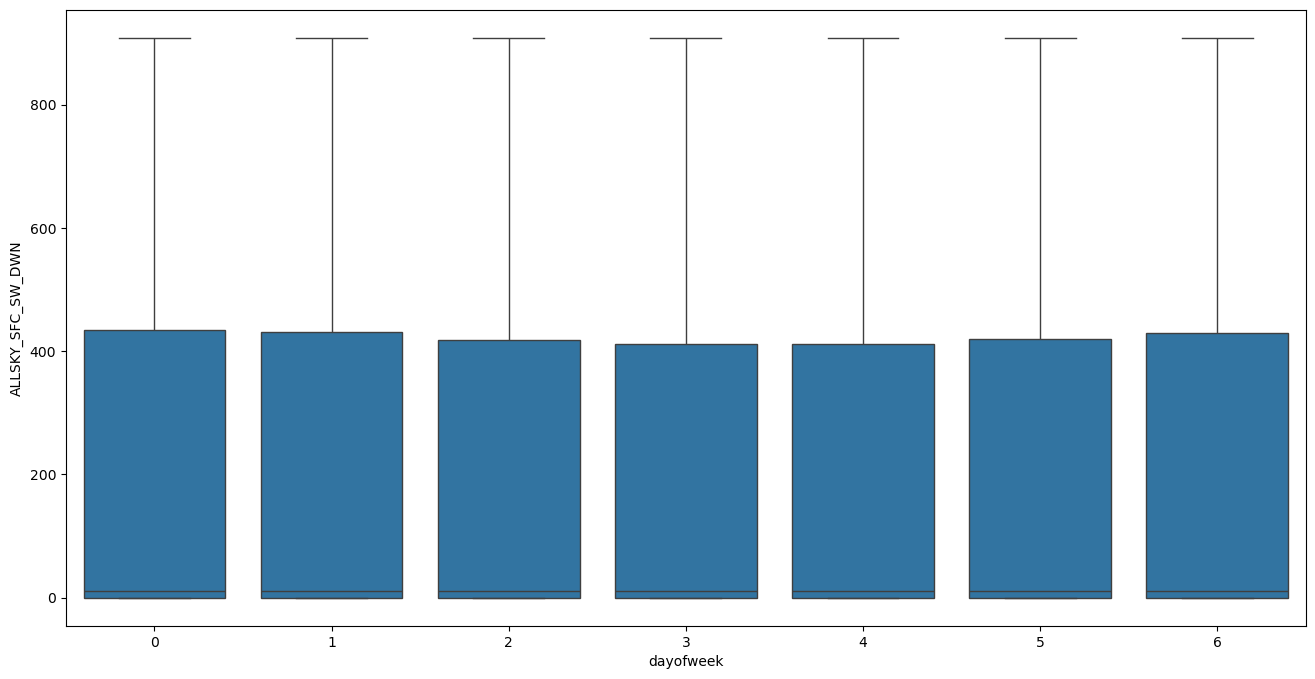

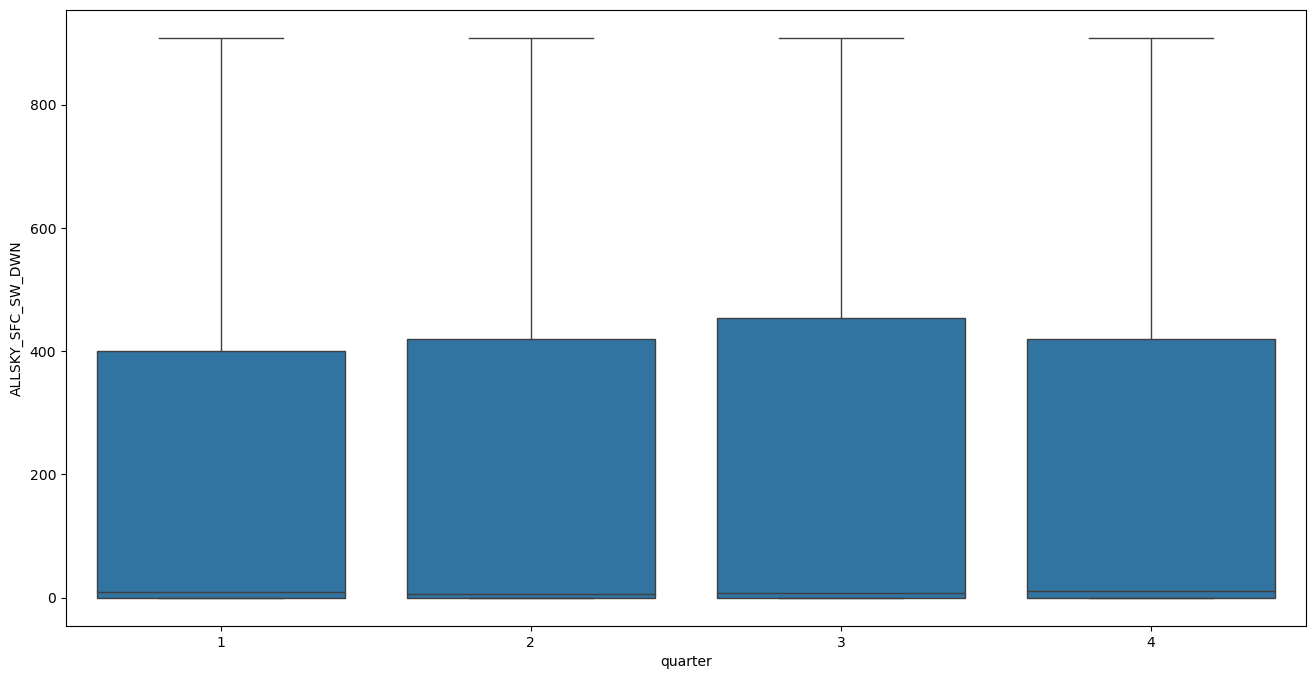

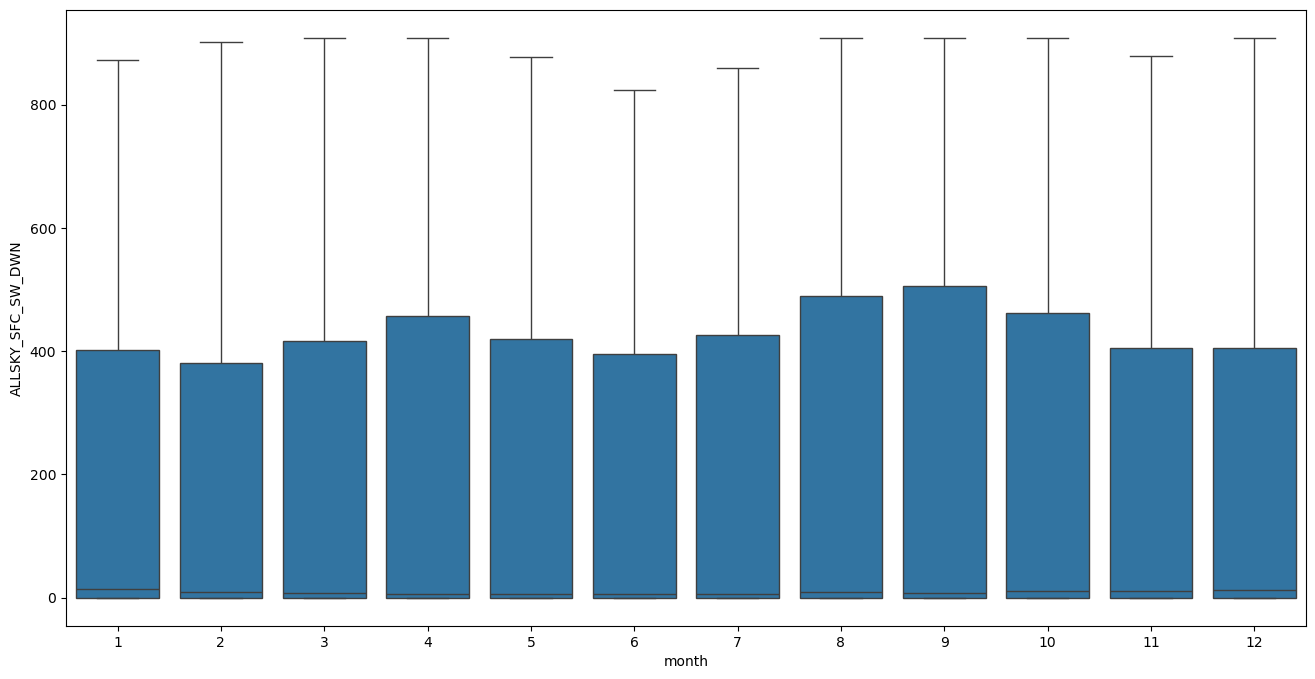

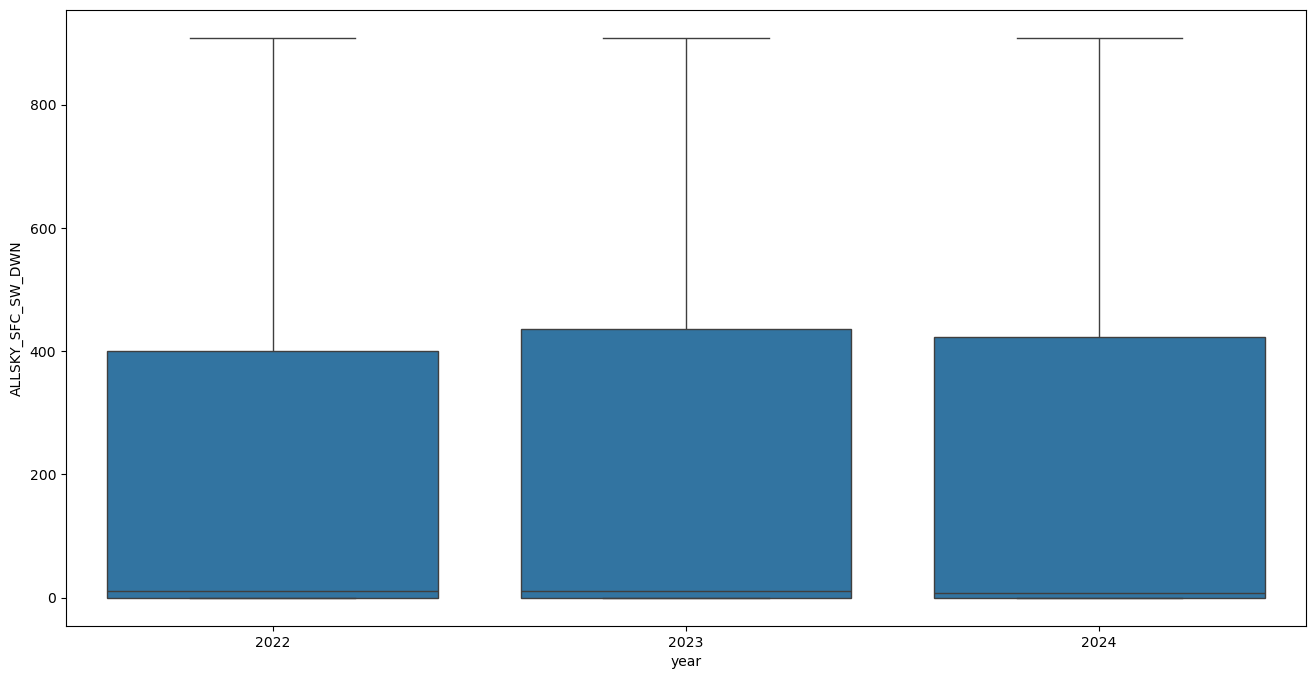

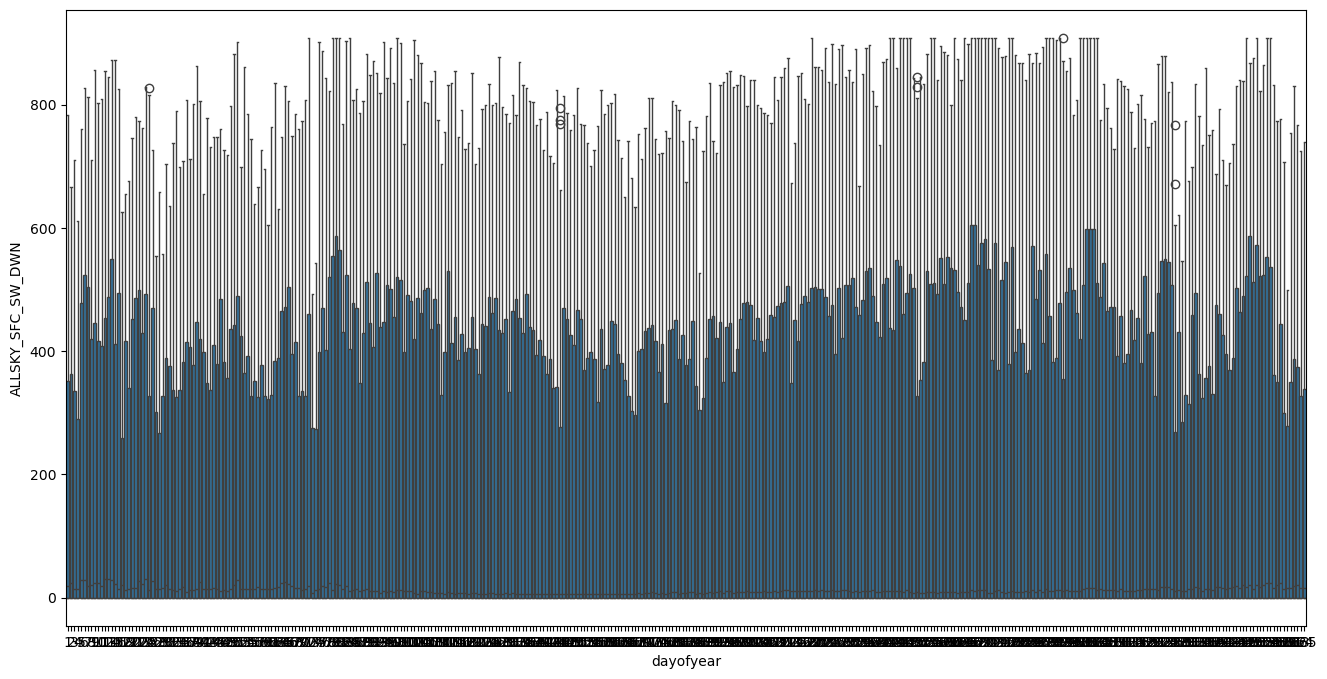

In [88]:
column = ['hour','dayofweek','quarter','month','year','dayofyear']
for i in column:
  fig, ax = plt.subplots(figsize=(16,8))
  sns.boxplot(data=data_df, x =i,y='ALLSKY_SFC_SW_DWN')
  plt.show()

In [89]:
data_df.to_csv('irradiance_dataset', encoding='utf-8', index=False)